## 1. Introduction
#### In this notebook, we explore trends in urban air pollution by analyzing PM2.5 concentrations over time across different countries. Our goal is to identify which countries have shown the most significant improvements in air quality, providing insights into positive environmental change. By using summary statistics, trend analysis, and residual-based methods, we aim to highlight countries that are making progress in reducing air pollution — a critical factor for public health and sustainability.

In [1]:
# ---------------------------
# 1. Library Imports
# ---------------------------

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.api as sm
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)

## 2. Load and Prepare Data

In [2]:
# ---------------------------
# 2. Load the Data
# ---------------------------

# Define file path
DATA_PATH = "../data/processed/pm25_cleaned.csv"

df = pd.read_csv(DATA_PATH)
df.head()

,IndicatorCode,Indicator,ValueType,ParentLocationCode,ParentLocation,Location type,SpatialDimValueCode,Location,Period type,Period,IsLatestYear,Dim1 type,Dim1,Dim1ValueCode,FactValueNumeric,FactValueNumericLow,FactValueNumericHigh,Value,Language,DateModified
0,SDGPM25,Concentrations of fine particulate matter (PM2.5),text,AFR,Africa,Country,KEN,Kenya,Year,2019,True,Residence Area Type,Cities,RESIDENCEAREATYPE_CITY,10.01,6.29,13.74,10.01 [6.29-13.74],EN,2022-08-12T05:00:00.000Z
1,SDGPM25,Concentrations of fine particulate matter (PM2.5),text,AMR,Americas,Country,TTO,Trinidad and Tobago,Year,2019,True,Residence Area Type,Rural,RESIDENCEAREATYPE_RUR,10.02,7.44,12.55,10.02 [7.44-12.55],EN,2022-08-12T05:00:00.000Z
2,SDGPM25,Concentrations of fine particulate matter (PM2.5),text,EUR,Europe,Country,GBR,United Kingdom of Great Britain and Northern I...,Year,2019,True,Residence Area Type,Cities,RESIDENCEAREATYPE_CITY,10.06,9.73,10.39,10.06 [9.73-10.39],EN,2022-08-12T05:00:00.000Z
3,SDGPM25,Concentrations of fine particulate matter (PM2.5),text,AMR,Americas,Country,GRD,Grenada,Year,2019,True,Residence Area Type,Total,RESIDENCEAREATYPE_TOTL,10.08,7.07,13.20,10.08 [7.07-13.20],EN,2022-08-12T05:00:00.000Z
4,SDGPM25,Concentrations of fine particulate matter (PM2.5),text,AMR,Americas,Country,BRA,Brazil,Year,2019,True,Residence Area Type,Towns,RESIDENCEAREATYPE_TOWN,10.09,8.23,12.46,10.09 [8.23-12.46],EN,2022-08-12T05:00:00.000Z


## 3. Summary Statistics
#### To build a foundational understanding of the data, we performed a series of summary statistical analyses focusing on the FactValueNumeric variable, which represents PM2.5 levels. This included:

- #### Descriptive Statistics: Calculation of central tendency and dispersion metrics such as the mean, median, standard deviation, minimum, and maximum PM2.5 values.
- #### Distribution Analysis: Examination of PM2.5 levels across different geographic and demographic dimensions to determine which regions or categories consistently exhibit high or low pollution levels.

In [3]:
# ---------------------------
# 3. Statistical Summary
# ---------------------------

# 3.1 Overall Summary for all PM2.5 values
df['FactValueNumeric'].describe()

count    9169.000000
mean       22.229568
std        13.174273
min         4.590000
25%        11.660000
50%        19.050000
75%        29.260000
max        59.560000
Name: FactValueNumeric, dtype: float64

In [4]:
# 3.2 Summary by year
year_summary = df.groupby('Period')['FactValueNumeric'].agg(['mean', 'median', 'min', 'max', 'std']).round(2)
year_summary

,mean,median,min,max,std
Period,,,,,
2010,22.79,20.52,4.65,58.95,12.80
2011,22.96,20.44,4.59,59.45,13.28
2012,22.66,19.62,4.93,59.56,13.42
2013,22.15,19.49,4.75,59.05,12.82
2014,22.17,19.12,4.98,59.30,13.11
2015,22.29,18.87,4.97,59.52,13.35
2016,22.22,18.67,4.93,59.20,13.44
2017,21.94,18.42,4.94,59.39,13.26
2018,21.87,18.47,5.13,59.51,13.23


In [5]:
# 3.3 Summary by country
country_summary = df.groupby('Location')['FactValueNumeric'].agg(['mean', 'median', 'min', 'max', 'std']).round(2)
country_summary

,mean,median,min,max,std
Location,,,,,
Afghanistan,56.03,56.00,55.08,57.00,0.96
Albania,19.85,19.40,15.65,23.41,1.95
Algeria,22.34,22.49,20.20,24.13,0.94
Andorra,9.96,9.71,7.96,12.13,1.11
Angola,26.60,26.30,22.37,33.19,2.89
...,...,...,...,...,...
Viet Nam,21.24,21.47,16.97,25.18,2.13
Yemen,41.19,41.28,37.00,44.60,1.75
Zambia,18.01,17.58,16.10,20.07,1.23


In [6]:
# 3.4 Top 10 most polluted countries
top10_polluted = country_summary.sort_values(by='mean', ascending=False).head(10)
top10_polluted

,mean,median,min,max,std
Location,,,,,
Kuwait,56.87,56.72,52.82,59.02,1.60
Qatar,56.55,56.50,51.92,59.30,2.06
Saudi Arabia,56.48,56.69,51.98,58.60,1.63
Cameroon,56.22,57.01,50.83,59.56,2.55
Tajikistan,56.20,56.38,50.58,59.39,2.91
Afghanistan,56.03,56.00,55.08,57.00,0.96
Pakistan,55.26,55.82,48.52,59.51,2.72
Nigeria,55.04,55.10,51.15,58.56,1.96
Bahrain,54.22,54.40,49.32,59.45,2.34


In [7]:
# 3.5 Top 10 cleanest countries
bottom10_polluted = country_summary.sort_values(by='mean', ascending=True).head(10)
bottom10_polluted

,mean,median,min,max,std
Location,,,,,
Bahamas,5.30,5.28,4.59,6.17,0.35
Finland,6.49,6.40,4.93,8.74,0.97
Niue,6.55,6.52,6.34,6.75,0.15
Iceland,6.58,6.46,5.47,8.49,0.71
Sweden,6.70,6.62,5.24,8.89,0.88
Tuvalu,6.84,6.83,6.70,6.95,0.08
Nauru,6.93,7.37,5.32,7.59,0.85
Canada,7.04,7.12,5.06,8.57,0.87
Estonia,7.14,7.02,5.40,8.89,0.88


In [8]:
# 3.6 Summary by region
region_summary = df.groupby('ParentLocation')['FactValueNumeric'].agg(['mean', 'median', 'min', 'max', 'std']).round(2)
region_summary

,mean,median,min,max,std
ParentLocation,,,,,
Africa,29.40,29.05,9.77,59.56,12.46
Americas,14.65,12.84,4.59,34.66,6.57
Eastern Mediterranean,33.26,29.23,12.32,59.51,13.36
Europe,18.41,15.70,4.93,59.39,10.51
South-East Asia,30.81,26.17,11.68,59.07,13.47
Western Pacific,14.73,8.45,5.32,59.52,11.26


In [9]:
# 3.7 Summary by Area Type
area_summary = df.groupby('Dim1')['FactValueNumeric'].agg(['mean', 'median', 'min', 'max', 'std']).round(2)
area_summary

,mean,median,min,max,std
Dim1,,,,,
Cities,24.40,21.34,4.59,59.53,13.29
Rural,20.94,17.52,4.92,59.13,12.89
Total,21.63,18.47,4.92,59.39,12.95
Towns,21.91,18.49,5.22,59.45,13.09
Urban,22.58,19.12,4.92,59.56,13.44


In [10]:
# 3.8 Guideline Benchmarking
guideline  = 22 # mean guideline (µg/m³)

above_guideline = df[df['FactValueNumeric'] > guideline]
pct_above = len(above_guideline) / len(df) * 100

print("\nGuideline Benchmarking:")
print(f"- Annual guideline: {guideline} µg/m³")
print(f"- Observations above guideline: {len(above_guideline)} ({pct_above:.1f}%)")
print(f"- Highest value: {df['FactValueNumeric'].max():.1f} µg/m³")
print(f"- Lowest value: {df['FactValueNumeric'].min():.1f} µg/m³")

# By region
print("\nPercentage above guideline by region:")
display(above_guideline.groupby('ParentLocation').size() / df.groupby('ParentLocation').size() * 100)


Guideline Benchmarking:
- Annual guideline: 22 µg/m³
- Observations above guideline: 3835 (41.8%)
- Highest value: 59.6 µg/m³
- Lowest value: 4.6 µg/m³

Percentage above guideline by region:


ParentLocation
Africa                   65.815664
Americas                 16.508876
Eastern Mediterranean    82.814178
Europe                   26.017214
South-East Asia          68.918919
Western Pacific          20.808255
dtype: float64

## 4. Trend Analysis (Countries)

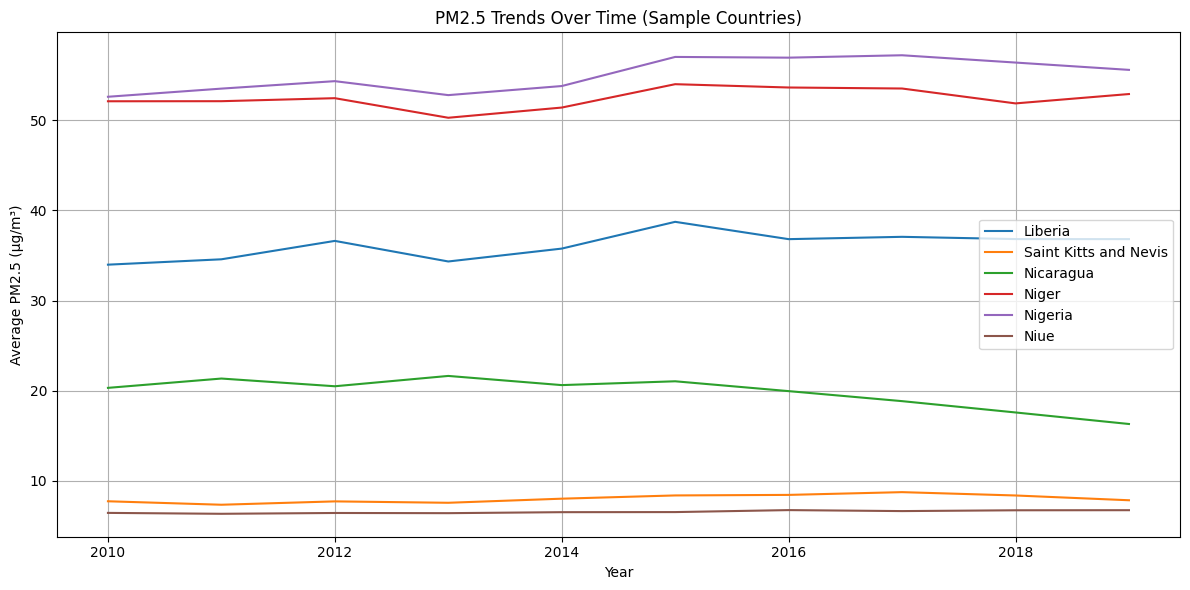

In [11]:
# ----------------------------
# 4. Trend Analysis by Country 
# ----------------------------

# 4.1 (Mean) PM2.5 over time by country 
trend_df = df.groupby(['Location', 'Period'])['FactValueNumeric'].mean().reset_index()
top_countries = trend_df['Location'].value_counts().head(6).index  # pick frequent countries

# Plot example for a few countries
plt.figure(figsize=(12, 6))
for country in top_countries:
    subset = trend_df[trend_df['Location'] == country]
    plt.plot(subset['Period'], subset['FactValueNumeric'], label=country)
plt.title("PM2.5 Trends Over Time (Sample Countries)")
plt.xlabel("Year")
plt.ylabel("Average PM2.5 (µg/m³)")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

In [12]:
# 4.2 Compute county-level improvement
first_year = df['Period'].min()
last_year = df['Period'].max()

start_vals = df[df['Period'] == first_year].groupby('Location')['FactValueNumeric'].mean()
end_vals = df[df['Period'] == last_year].groupby('Location')['FactValueNumeric'].mean()

improvement = (start_vals - end_vals).sort_values(ascending=False)
improvement_df = improvement.reset_index().rename(columns={0: 'Improvement'})

# Top 10 improving countries
print("Top 10 countries with largest improvement in air quality:")
improvement_df.head(10)

Top 10 countries with largest improvement in air quality:


,Location,FactValueNumeric
0,North Macedonia,10.018
1,Bosnia and Herzegovina,9.306
2,Democratic People's Republic of Korea,9.132
3,China,9.054
4,Uzbekistan,7.954
5,Serbia,7.756
6,Poland,7.700
7,Kyrgyzstan,7.342
8,Bulgaria,6.928
9,Armenia,6.758


## 5. City-Level Improvement

### Which cities or urban areas have seen the biggest improvements in air quality over time — and in which countries are they located? 

In [13]:
# ----------------------------
# 5. City-Level Improvement 
# ----------------------------

# City level deep dive
# Tracking PM2.5 in each city/urban area over time.
df_city = df[df['Dim1'].isin(['Cities', 'Urban'])]
city_trends = df_city.groupby(['Location', 'Dim1', 'Period'])['FactValueNumeric'].mean().reset_index()


# Improvement from first to last year
start_city = df[df['Period'] == first_year].groupby(['Location', 'Dim1'])['FactValueNumeric'].mean()
end_city = df[df['Period'] == last_year].groupby(['Location', 'Dim1'])['FactValueNumeric'].mean()

city_improvement = (start_city - end_city).sort_values(ascending=False).reset_index()
city_improvement.columns = ['Location', 'Dim1', 'Improvement']
city_improvement = city_improvement[city_improvement['Dim1'].isin(['Cities', 'Urban'])]

top_cities = city_improvement.head(10)
top_cities

,Location,Dim1,Improvement
0,North Macedonia,Cities,12.48
1,North Macedonia,Urban,10.81
2,Bosnia and Herzegovina,Cities,10.39
3,Bosnia and Herzegovina,Urban,9.82
4,Democratic People's Republic of Korea,Cities,9.76
7,Democratic People's Republic of Korea,Urban,9.44
9,China,Urban,9.36
11,China,Cities,9.03
14,Uzbekistan,Cities,8.92
19,Poland,Cities,8.43


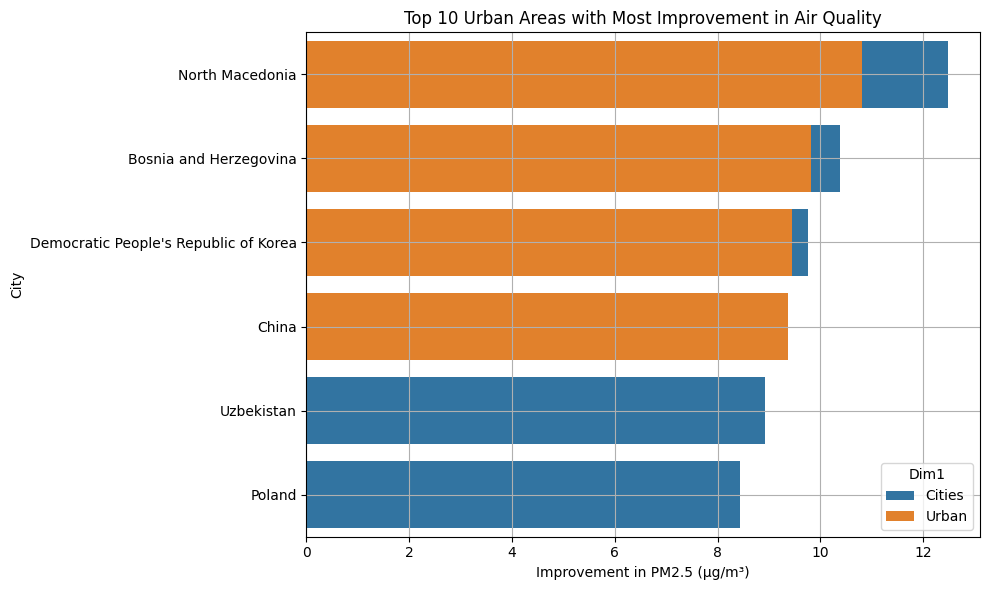

In [14]:
plt.figure(figsize=(10, 6))
sns.barplot(data=top_cities, y='Location', x='Improvement', hue='Dim1', dodge=False)
plt.title("Top 10 Urban Areas with Most Improvement in Air Quality")
plt.xlabel("Improvement in PM2.5 (µg/m³)")
plt.ylabel("City")
plt.grid(True)
plt.tight_layout()
plt.show()

## 6. Urban (and Cities) vs Rural (and Towns) Comparison

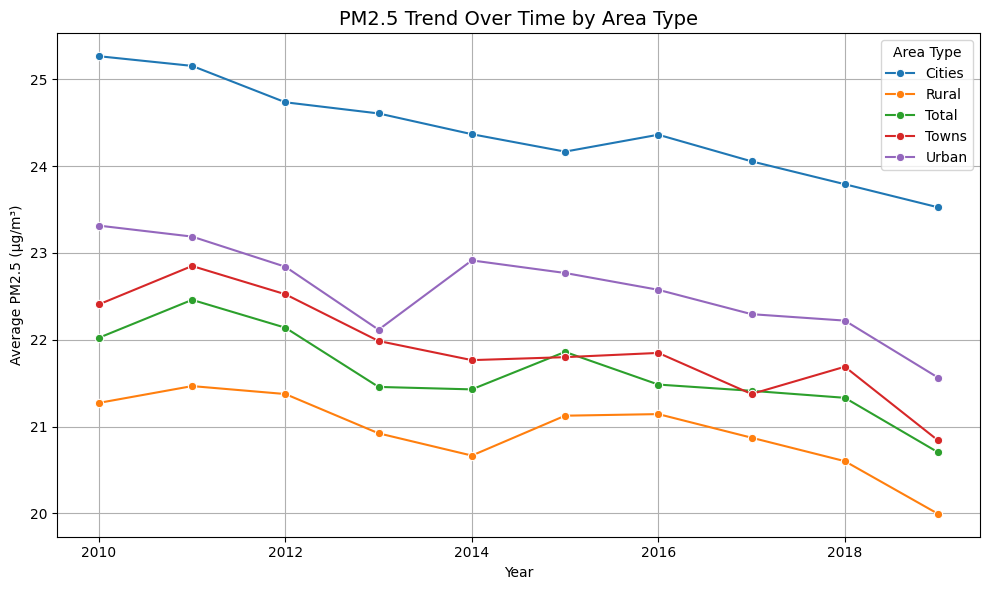

In [15]:
# ----------------------------
# 6. Urban vs Rural Comparison 
# ----------------------------

# 6.1 ...
area_trends = df.groupby(['Dim1', 'Period'])['FactValueNumeric'].mean().reset_index()

plt.figure(figsize=(10, 6))
sns.lineplot(data=area_trends, x='Period', y='FactValueNumeric', hue='Dim1', marker='o')
plt.title("PM2.5 Trend Over Time by Area Type", fontsize=14)
plt.xlabel("Year")
plt.ylabel("Average PM2.5 (µg/m³)")
plt.grid(True)
plt.legend(title='Area Type')
plt.tight_layout()
plt.show()

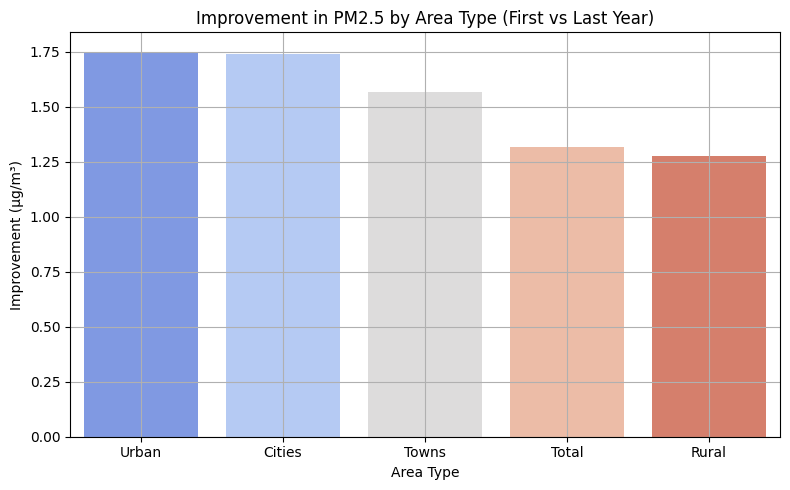

In [16]:
# 6.2 Improvement by area type
start_vals = df[df['Period'] == first_year].groupby('Dim1')['FactValueNumeric'].mean()
end_vals = df[df['Period'] == last_year].groupby('Dim1')['FactValueNumeric'].mean()

improvement_by_area = (start_vals - end_vals).sort_values(ascending=False).reset_index()
improvement_by_area.columns = ['Area Type', 'Improvement']

plt.figure(figsize=(8, 5))
sns.barplot(data=improvement_by_area, x='Area Type', y='Improvement', palette='coolwarm')
plt.title("Improvement in PM2.5 by Area Type (First vs Last Year)")
plt.ylabel("Improvement (µg/m³)")
plt.xlabel("Area Type")
plt.grid(True)
plt.tight_layout()
plt.show()

## 7. Residual Analysis
#### To further investigate unusual patterns in the data, we fitted an Ordinary Least Squares (OLS) regression model using ParentLocation and Dim1 as predictors of PM2.5 levels. Residuals—defined as the difference between actual and predicted PM2.5 values—were then analyzed to identify anomalous observations. This residual-based approach provides two key benefits:

- #### Detection of Irregularities: Residuals reveal data points that deviate significantly from the model’s expectations, indicating possible outliers.

- #### Contextual Insight: It highlights country- or category-specific deviations that may not be captured by global summary statistics alone.

#### Boxplots and IQR-based techniques were used to flag outliers in the residuals, offering a systematic way to identify unusual patterns and potential anomalies.

In [17]:
# ---------------------------
# 7. ML Modeling
# ---------------------------

# 7.1 Linear Regression Model Fitting
# Step 1: One-hot encode categorical variables (and ensure dtype is float)
X = pd.get_dummies(df[['Dim1', 'ParentLocation']], drop_first=True).astype(float)

# Step 2: Define target variable
y = df['FactValueNumeric'].astype(float)

# Step 3: Add constant to the predictors
X = sm.add_constant(X)

# Step 4: Fit the Linear Regression Model
model = sm.OLS(y, X).fit()

# Step 5: Print the summary of the model
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:       FactValueNumeric   R-squared:                       0.301
Model:                            OLS   Adj. R-squared:                  0.301
Method:                 Least Squares   F-statistic:                     438.7
Date:                Tue, 22 Jul 2025   Prob (F-statistic):               0.00
Time:                        16:57:04   Log-Likelihood:                -35006.
No. Observations:                9169   AIC:                         7.003e+04
Df Residuals:                    9159   BIC:                         7.010e+04
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                                           coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------


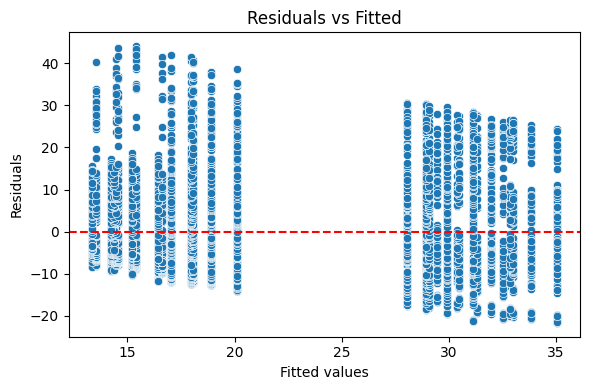

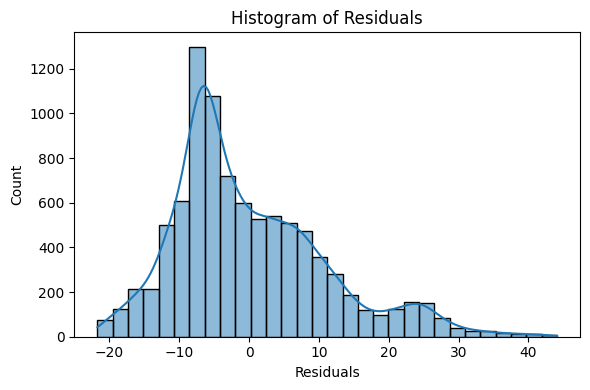

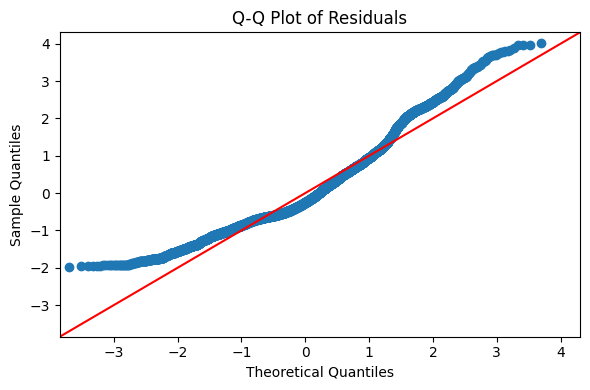

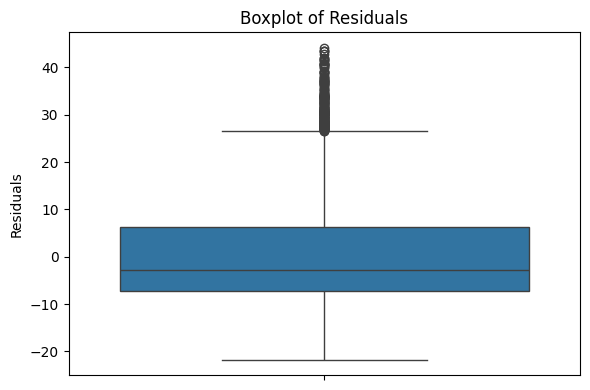

In [18]:
# 7.2 Visualization

# Predicted values and residuals
fitted_vals = model.fittedvalues
residuals = model.resid

# 4.2.1 Residuals vs Fitted
plt.figure(figsize=(6, 4))
sns.scatterplot(x=fitted_vals, y=residuals)
plt.axhline(0, color='red', linestyle='--')
plt.xlabel('Fitted values')
plt.ylabel('Residuals')
plt.title('Residuals vs Fitted')
plt.tight_layout()
plt.show()

# 4.2.2 Histogram of Residuals
plt.figure(figsize=(6, 4))
sns.histplot(residuals, kde=True, bins=30)
plt.xlabel('Residuals')
plt.title('Histogram of Residuals')
plt.tight_layout()
plt.show()

# 4.2.3 Q-Q Plot 
fig, ax = plt.subplots(figsize=(6, 4))
sm.qqplot(residuals, line='45', fit=True, ax=ax)
plt.title('Q-Q Plot of Residuals')
plt.tight_layout()
plt.show()

# 4.2.4 Boxplot of residuals
plt.figure(figsize=(6, 4))
sns.boxplot(y=residuals)
plt.title("Boxplot of Residuals")
plt.ylabel("Residuals")
plt.tight_layout()
plt.show()

In [19]:
resid_df = pd.DataFrame({'Residuals': residuals})

# Calculate Q1, Q3, and IQR
Q1 = resid_df['Residuals'].quantile(0.25)
Q3 = resid_df['Residuals'].quantile(0.75)
IQR = Q3 - Q1

# Define bounds
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

outliers = resid_df[(resid_df['Residuals'] < lower_bound) | (resid_df['Residuals'] > upper_bound)]

# Display outliers
outliers

,Residuals
632,26.848451
634,26.844198
695,33.530501
696,35.207233
709,35.700701
...,...
9000,42.027233
9001,28.994111
9002,27.108985
9004,27.046708


## 8. Conclusion

#### This analysis explored global urban air quality trends using summary statistics, temporal comparisons, and regression-based residual analysis.

#### Key findings:
- #### Several countries have significantly improved air quality in cities (with the top three being North Macedonia	(10.018), Bosnia and Herzegovina	(9.306), and Democratic People's Republic of Korea (9.132)).
- #### City-level trends reveal specific urban (and city) areas leading this improvement.
- #### Urban (and city) areas tend to show more improvement than rural (and town) areas, suggesting focused policy efforts may be working.
- #### Residual analysis highlights unexpected patterns and outliers not visible in aggregate statistics.

#### These insights support decision-making for environmental policy, public health, and sustainable development.